<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>

# Week 2: Unsupervised Learning

The purpose of this activity is to explore the value of clustering algorithms (unsupervised learning) in learning analytics contexts. In learning analytics, we can use clusters to group students by common attributes.

## Introduction to Clustering

Statistical learning tasks are commonly categorized into two general types: supervised and unsupervised learning (technically, there is a third category {semi-supervised learning}, which lies outside the scope of this discussion). In supervised learning, we have an outcome variable (labeled data) that we are training our model against. For example, in learning analytics, we might use student behavior data, assignment scores, attendance, and enrollment status to create a student drop-out model for an online course. This is an example of supervised learning and much of data science is focused on these types of applications. 

In this section, you will explore the second category of learning problems: unsupervised learning. In unsupervised learning, we are not modeling to predict labeled data; rather, we are exploring how data can be grouped together. Unsupervised learning does not have a "ground truth" that we can use to train and validate the model. In many unsupervised learning applications, we attempt to "cluster" data together in ways that maximize the similarity within each group and maximize the differences between groups. In learning analytics, this can be helpful to determine groupings of students who may have common needs. 

There is no single, superior clustering method that provides the best clusters in all situations. As Chapman and Feit (2015) remind us that like computer science there is no “free lunch” in analytics: “…the average performance of any pair of algorithms across all possible problems is identical” (p. 300). A consequence of this reality is that we should explore multiple approaches to clustering and evaluate their results against our business problem. There are many types of clustering algorithms (over 100), and they often produce very different results. We will focus on a few that are used regularly. 

In general, clustering algorithms require several common ingredients. First, we need data upon which to base our clusters. We call these data basis variables. In learning analytics, common basis variables can include student performance data. For this assignment, the basis variables have been provided. Second, clustering algorithms attempt to group observations based on a similarity index – a way of judging the degree to which two observations are similar. Similarity indices (also known as distance metrics) can vary depending on the type of data (continuous, categorical), and a common example of a similarity (distance) metric is Euclidean distance. Third, each clustering algorithm employs an algorithm, a way in which it processes through the data to arrive at clusters. Algorithms can be connective (such as hierarchical models), in which aggregate or disaggregate clusters are created based on a distance metric in a tree-like structure. This process can run both top-down and bottom-up. Partition models – like the very popular k-means – require the number of clusters to be known ahead of time and iteratively process through the idea to find an optimized solution. Distributional models are special in that they make distributional assumptions about the underlying data we are trying to cluster (such as the data conforming to a Gaussian distribution). Finally, density models are well-suited to cluster unusual patterns in data that may confuse simpler algorithms like k-means (Kaushik, 2016). For this project, we’ll evaluate clusters produced by k-means, a popular approach to clustering.

### K-means

K-means is a partition-based clustering algorithm that requires numeric data and knowing the number of clusters a priori. We define the number of number of clusters, and then the algorithm picks random centroids (the center of each cluster). It calculates the "distance" of each point to the centroids and assigns data points to the closest centroid. It then takes the mean of each data point in a cluster (hence the name "k-means") and creates a new centroid. This process continues until the centroids converges to a static location and stop moving. 

The question of the number of clusters is a key decision in k-means, and it can be handled in different ways. We can run multiple models with different numbers of clusters and judge the results, but that can be somewhat inefficient. Another option are scree plots. Scree plots allow for the analyst to compare within-group sums of squares to the number of clusters, looking for the “elbow” in the graph where increasing clusters only marginally decreases the sum of squares. Of course, in selection of a final clustering solution, we need to consider more than the clusters’ statistical properties. The business utility of clusters will ultimately determine their value. 


## Review of Clustering Through K-Means

In the following section, we will review the basics of clustering through k-means. We begin by loading a data set of sales data of customers of a mall in the United States. The dataset includes some basic customer attributes including age, income, gender, etc. We will use these attributes to identify clusters of customers.

In [133]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [134]:
#Load the Mall Data
mall_df= pd.read_csv("assets/mall_customers.csv")

In [135]:
#View Columns
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [136]:
#Create a copy of the original dataframe
mall_df_cluster=mall_df

In [137]:
mall_df_cluster

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [138]:
# Before we begin modeling the clusters we should (1) isolate the variables of interest, 
# and (2) standardize those variables. Because clusters are built on the relative 'distance' between points
# in a multi-dimensional space, standardization helps equalize the influence of each variable by normalizing the 
# underlying units. 

# Select the variables that inform clustering and subset them as X1.
X1 = mall_df_cluster.iloc[:,2:5]

# Standardize the factors
X1 = preprocessing.scale(X1)

Now that the data are prepared, we can begin the process of modeling k-means. We will use ```sklearn.cluster.KMeans``` to model the clusters (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Sklearn's kmeans algorithim has relatively few parameters. Some of them deal with computational efficicency, but one of special interest is the number of clusters that we include. 

There are a few strategies one can use to identify the number of clusters in a k-means model: 
1. One might know, *a priori*, the number clusters that would be relevant to the need. For example, if the marketing team is looking to target customers and has the capacity to differentiate for 3 different clusters, we can use k-means to create 3 clusters of relative similarity. While this approach may meet the need of the business, it may not be optimal statistically (e.g. three clusters may not be optimally similar). 
2. Another approach is to use the average silhoutte, which is a metric that ranges from -1 to +1 and measures cohesion and separation (where +1 means that the clusters are well-formed). Cohesion measures how similar a data point is to its own cluster, while separation is how disimilar it is to other clusters. The optimal number of clusters is the number that maximizes the average silhoutte value. 
3. A third approach is using principal component analysis (PCA). PCA is a common dimension reduction technique for highly dimensional data, used in a variety of contexts including regression and clustering. Principal components are a transformation of the existing variables in a data set to a few composite features through applied linear algebra. These composite features captures a unique portion of the overall variance in the original independent variables, while each component is independent and uncorrelated with the others (orthogonal). In the clustering context, we can use PCA to identify approximately how many clusters capture 80% of the total variation in the original data by looking at how many principal components are needed to explain 80% of the data's variance.
4. A final approach is called the elbow method. In the elbow method, we calcuate the overall inertia (the distance from data points and the center of their cluster, the centroid) in the k-means algorithm, and plot the inertia produced by k-mean models that vary by the number of clusters they include. The goal here is not to find the lowest inertia, as that will always correspond to the maximum number of clusters we plot. Rather, we want to find that point where adding addition clusters provides diminishing returns in the reduction of inertia. This can be identified visually through an elbow plot (which we will demonstrate) or by calcuating a distortion metric.

One note: kmeans is an algorithm that will generally find a solution, but that does not always guarantee the solution will be optimal. This is because the algorithm may, in its search for a solution, get stuck in a local minima. In general, it is recommended you run your final configuration for kmeans multiple times and evaluate the quality of the clusters to find 
the best offered solution. However, for purposes of this exercise, we set the ```random_state``` to allow reproducibility as you experiment and learn with the code. If preferrable, you can always remove this parameter and let the results vary.

In [139]:
# Set up the code to calculate the inertia statistic for each k-means model for clusters 1 through 11. 
# This array of inertia values can be used for plotting our elbow graph.
# random_state is set for reproducibility. 

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

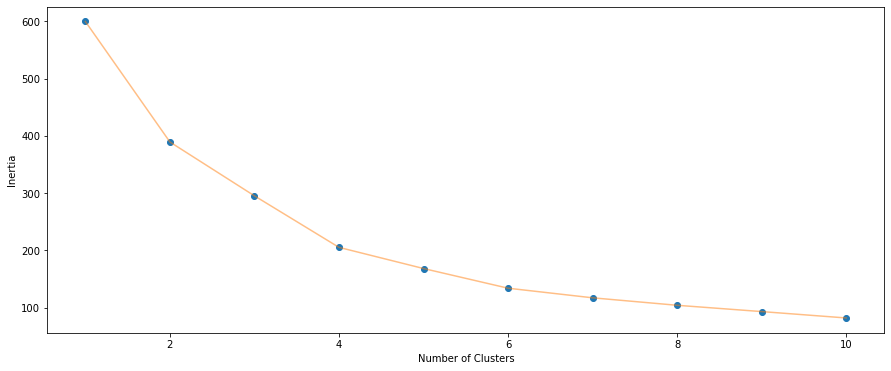

In [140]:
#Plot the interia points to create the elbow plot

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Using elbow plot above, we can see an elbow around 4 clusters; we may use a secondary method or additional diagnostics to determine the number of clusters. In this case, we accept the visual presentation and select 4 clusters as the most viable solution for these data. 

Having identified the number of clusters, we can proceed with the modeling process.

In [141]:
# Run the clustering algorithm with n=4 clusters

km= KMeans(n_clusters=4)
km.fit(X1)

KMeans(n_clusters=4)

Having identified the clusters, we now should explore them. In order to fully leverage clusters, it is helpful describe the clusters. What is common about the customers in each cluster?

In [142]:
# Use kmeans.predict() to generate the clusters for our data
predict=km.predict(X1)

In [143]:
# Attach those clusters back to the original data frame
mall_df_cluster['cluster'] = pd.Series(predict, index=mall_df_cluster.index)

In [144]:
# View new data frame
mall_df_cluster

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [145]:
# Descriptive Stat #1: Calculate the size of each cluster
mall_df_cluster.groupby(['cluster']).size()

cluster
0    65
1    40
2    38
3    57
dtype: int64

In [146]:
#Descriptive Stat #2: Find the mean value for age, income, and spending score for each cluster
mall_df_cluster.groupby(['cluster']).agg(['mean']).round(2).reset_index()

,cluster,CustomerID,Age,Annual_Income,Spending_Score
,,mean,mean,mean,mean
0,0,69.42,53.98,47.71,39.97
1,1,161.02,32.88,86.10,81.53
2,2,160.55,39.37,86.50,19.58
3,3,53.44,25.44,40.00,60.30


In [147]:
#Descriptive Stat #3: Find the count of cluster by gender
mall_df_cluster.groupby(['cluster', 'Gender']).size()

cluster  Gender
0        Female    37
         Male      28
1        Female    22
         Male      18
2        Female    19
         Male      19
3        Female    34
         Male      23
dtype: int64

We can use the descriptives statistics above (and many others) to describe the clusters. This can be a very helpful way to inform how we use clusters in a variety of contexts: marketing (segmentation), medicine (treatment), or learning (academic interventions).

# Clustering Open University Data


# 1. **Data loading**

In [148]:
# Use read_csv to read the three files into dataframes
lr = pd.read_csv('assets/learning_resources.csv')
qt = pd.read_csv('assets/quizzes_tests.csv')
si = pd.read_csv('assets/student_info.csv')

In [149]:
lr.head()

,id_student,activity_type,activity_id,date,sum_click
0,420388,resource,219,0,1
1,420388,course_homepage,1,0,3
2,420388,course_page,87,0,1
3,420388,resource,229,0,2
4,420388,course_page,1,0,2


In [150]:
qt.head()

,id_student,assignment_name,due_date,weight,date_submitted,score
0,41060,Quiz 1,23,2.0,25.0,77
1,41060,Test 1,25,7.5,24.0,85
2,41060,Quiz 2,51,3.0,54.0,94
3,41060,Test 2,53,10.0,53.0,86
4,41060,Quiz 3,79,3.0,81.0,94


In [151]:
#weighted score was calculated and added to the original df to help provide a better score accuracy while attempting to 
#judge the students' performances.

qt['score_weight']=qt['score']*qt['weight']
qt.head()

,id_student,assignment_name,due_date,weight,date_submitted,score,score_weight
0,41060,Quiz 1,23,2.0,25.0,77,154.0
1,41060,Test 1,25,7.5,24.0,85,637.5
2,41060,Quiz 2,51,3.0,54.0,94,282.0
3,41060,Test 2,53,10.0,53.0,86,860.0
4,41060,Quiz 3,79,3.0,81.0,94,282.0


In [152]:
si.head()

,id_student,gender,highest_education,disability,final_result
0,41060,M,Some Higher Education,N,Fail
1,45664,M,Some Higher Education,N,Pass
2,52014,F,High School,N,Fail
3,53488,F,Some Higher Education,N,Pass
4,60135,F,High School + Advanced Placement,N,Pass


# 2. Data Wrangling and Feature Engineering (8 points)

As we observed in Week 1, `learning_resources.csv` and `quizzes_tests.csv` are structured as long-form files. For Week 2, we are going to wrangle these files into wide-format, cluster them individually, and clarify patterns in each. For `learning_resources.csv`, transforming into long-form will require summarization (the specific `agg` is up to you); for `quizzes_tests.csv`, it will largely require only rotating the `score` column. Thus, you will build your clusters, like in the above mall examples, on these data. After rotating each dataset, we will then identify optimal cluster numbers and apply a k-means algorithm. After generating cluster labels, we will join them onto each respective dataset and identify how clusters align with raw data to better understand students' assignment performances and resource use.

## Grading

2.1. (4 points) Create a dataframe for clustering from `quizzes_tests.csv`

2.2. (4 points) Create a dataframe for clustering from `learning_resources.csv`

**Note:** You will need to do some data wrangling using pandas, e.g., `pd.pivot_table` and `pd.groupby`.

2.1. (4 points) Create a dataframe for clustering from `quizzes_tests.csv`

In [153]:
## Your code with comments
# YOUR CODE HERE
qt_clustering = qt
#transform long to wide
qt_clustering_wide = pd.pivot_table(qt_clustering, index='id_student', columns='assignment_name', values='score_weight', aggfunc='sum').reset_index()
qt_clustering_wide.head()

assignment_name,id_student,Final Exam,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Test 1,Test 2,Test 3,Test 4,Test 5,Test 6
0,41060,0.0,154.0,282.0,282.0,388.0,348.0,183.0,0.0,637.5,860.0,1125.0,1260.0,840.0,0.0
1,45664,4000.0,94.0,0.0,150.0,252.0,276.0,174.0,402.0,495.0,460.0,675.0,975.0,825.0,750.0
2,52014,1300.0,106.0,159.0,126.0,108.0,80.0,0.0,0.0,607.5,700.0,487.5,0.0,540.0,210.0
3,53488,7300.0,186.0,291.0,300.0,372.0,376.0,291.0,510.0,600.0,610.0,1037.5,1185.0,945.0,765.0
4,60135,4000.0,114.0,258.0,183.0,212.0,260.0,84.0,114.0,570.0,760.0,1050.0,0.0,720.0,0.0


In [154]:
qt_clustering_wide.shape

(813, 15)

In [155]:
qt_clustering_wide.columns

Index(['id_student', 'Final Exam', 'Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4',
       'Quiz 5', 'Quiz 6', 'Quiz 7', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Test 6'],
      dtype='object', name='assignment_name')

2.2. (4 points) Create a dataframe for clustering from `learning_resources.csv`

In [156]:
## Your code with comments
# YOUR CODE HERE
lr_clustering = lr
lr_clustering_pivoted = lr_clustering.pivot_table(values='sum_click', index='id_student', columns='activity_type', aggfunc='sum').fillna('0').reset_index()
lr_clustering_pivoted

activity_type,id_student,course_homepage,course_page,forum,resource,wiki
0,41060,80.0,240.0,28.0,30.0,13.0
1,45664,287.0,387.0,135.0,171.0,46.0
2,52014,98.0,116.0,37.0,16.0,73.0
3,53488,311.0,222.0,536.0,115.0,184.0
4,60135,822.0,789.0,613.0,252.0,185.0
...,...,...,...,...,...,...
808,2678338,553.0,343.0,383.0,137.0,179.0
809,2683836,177.0,205.0,203.0,72.0,102.0
810,2689536,189.0,343.0,94.0,93.0,25.0
811,2693243,590.0,706.0,814.0,344.0,116.0


In [157]:
lr_clustering_pivoted.columns

Index(['id_student', 'course_homepage', 'course_page', 'forum', 'resource',
       'wiki'],
      dtype='object', name='activity_type')

# 3. Data Processing and Standardization (4 points)

## Grading

3.1. (2 points) Standardize wide-form variables for data frame from 2.1 (i.e., `quizzes_tests.csv`)

3.2. (2 points) Standardize wide-form variables for data frame from 2.2 (i.e., `learning_resources.csv`)

The next step is to process and standardize your data frames from above. Use `sklearn preprocessing` to standardize variables from wide-form data frames. Save the result, and store the key columns used to define your cluster predictors in “X1”. **Do not include** `id_student` **as a predictor.**

3.1. (2 points) Standardize wide-form variables for data frame from 2.1 (i.e., `quizzes_tests.csv`)

In [158]:
## Your code with comments
# YOUR CODE HERE
# Select the variables that inform clustering and subset them as X1.
X1 = qt_clustering_wide.iloc[:,2:15]

# Standardize the factors
X1_qt = preprocessing.scale(X1)
#X1_qt = X1_qt[~np.isnan(X1_qt)]

X1_qt

array([[ 0.45651821,  0.67402149,  1.0031398 , ...,  0.83606537,
         0.24207397, -1.06325086],
       [-0.85635517, -2.69992692, -0.44585341, ...,  0.26408691,
         0.21278734,  0.39919576],
       [-0.59378049, -0.7975943 , -0.70930672, ..., -1.69268153,
        -0.34365859, -0.65376581],
       ...,
       [ 0.45651821,  0.8893799 , -2.09243661, ...,  0.89627363,
        -1.39797719, -1.06325086],
       [ 1.33176712,  0.78170069,  1.0031398 , ...,  1.25752319,
         1.17924606,  1.48140627],
       [-0.41873071,  0.60223535, -0.08360511, ...,  0.50491994,
         0.62280013,  1.04267228]])

3.2. (2 points) Standardize wide-form variables originating from `learning_resources.csv`

In [159]:
## Your code with comments
# YOUR CODE HERE
# Select the variables that inform clustering and subset them as X1.
X1 = lr_clustering_pivoted.iloc[:,2:6]

# Standardize the factors
#X1_qt = X1_qt[~np.isnan(X1_qt)]
X1_lr = preprocessing.scale(X1)

X1_lr

array([[-0.62711321, -0.80960638, -0.80194017, -0.85666153],
       [-0.18055399, -0.53088155,  0.14900487, -0.52689551],
       [-1.00380262, -0.78616224, -0.89636025, -0.25708696],
       ...,
       [-0.31421798, -0.63768265, -0.37704984, -0.73674661],
       [ 0.78850989,  1.23784891,  1.31576722,  0.17260815],
       [-0.71520993, -0.30425482, -0.33658409, -0.47693097]])

# 4. **Identifying the optimal number of clusters for K-means** (4 points)

## Grading

4.1. (2 points) Identify optimal clusters for data frame from 3.1 (i.e., `quizzes_tests.csv`)

4.2. (2 points) Identify optimal clusters for data frame from 3.2 (i.e., `learning_resources.csv`)

As noted in our mall customer example, we must first specify the number of clusters before running k-means. Using one of the techniques described above (inertia, silhouette, PCA) identify the number of optimal clusters for your data. Be sure to include a visualization of your approach.

4.1. (2 points) Identify optimal clusters for data frame from 3.1 (i.e., `quizzes_tests.csv`)

In [160]:
## Your code with comments
# YOUR CODE HERE
# Set up the code to calculate the inertia statistic for each k-means model for clusters 1 through 11. 
# This array of inertia values can be used for plotting our elbow graph.
# random_state is set for reproducibility. 

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1_qt)
    inertia.append(algorithm.inertia_)
    
##Alternative Method    
#qt_pca = PCA()
#qt_pca.fit(qt_X1)
#qt_pca.explained_variance_ratio_
#plt.figure(figsize = (10,8))
#plt.plot(range(1, 15), qt_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
#plt.axhline(y = 0.8, color = 'red')
#plt.title('Explained Variance by Components')
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance')
#print('The optimal cluster is 4')    

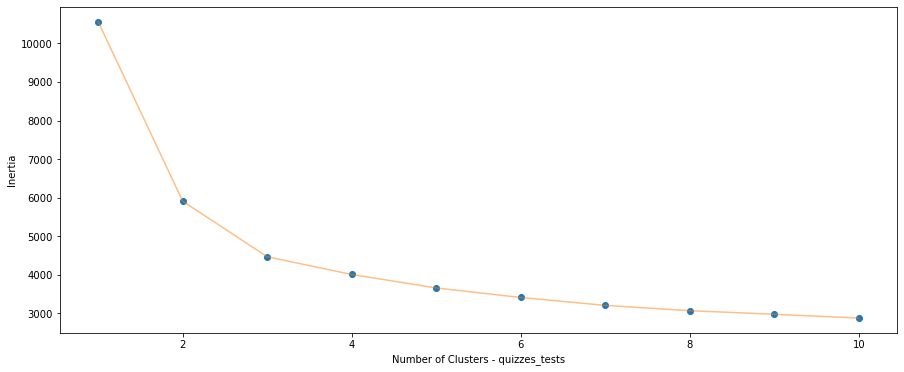

In [161]:
#Plot the interia points to create the elbow plot

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters - quizzes_tests') , plt.ylabel('Inertia')
plt.show()

4.2. (2 points) Identify optimal clusters for data frame from 3.2 (i.e., `learning_resources.csv`)

In [162]:
## Your code with comments
# YOUR CODE HERE
# Set up the code to calculate the inertia statistic for each k-means model for clusters 1 through 11. 
# This array of inertia values can be used for plotting our elbow graph.
# random_state is set for reproducibility. 

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1_lr)
    inertia.append(algorithm.inertia_)

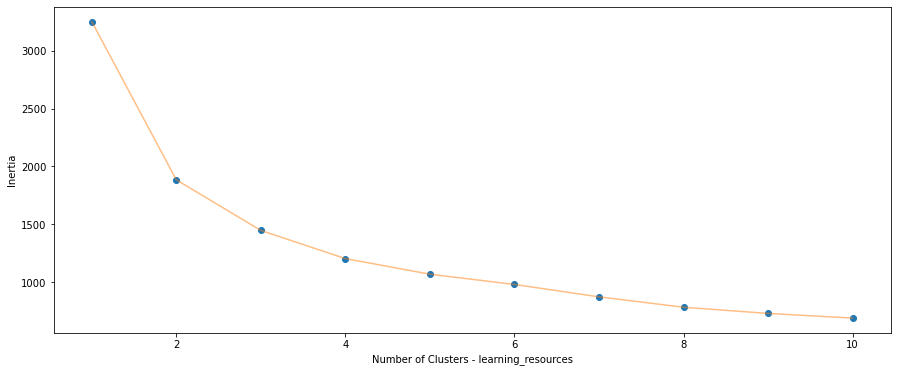

In [163]:
#Plot the interia points to create the elbow plot

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters - learning_resources') , plt.ylabel('Inertia')
plt.show()

## 5. Build the K-means model and explore the characteristics of the clusters (24 points)

Now that you have identified the number of clusters, it is time to build the model and interrogate the results.

## Grading

5.1. (4 points) Using the optimal number of clusters you identified, build your k-means model on data frame from 4.1 (i.e., `quizzes_tests.csv`)

5.2. (4 points) Using the optimal number of clusters you identified, build your k-means model on data frame from 4.2 (i.e., `learning_resources.csv`)

5.3. (2 points) Join cluster labels onto data frame from 5.1

5.4. (2 points) Join cluster labels onto data frame from 5.2

5.5. (2 points) Create descriptive table of features using cluster labels for data frame from 5.3

5.6. (2 points) Create descriptive table of features using cluster labels for data frame from 5.4

5.7 (2 points) Join data frames from 5.3 and 5.4

5.8 (2 points) Create a cross-tabulation of quiz- and resource-based cluster labels (i.e., counts of students in each cell)

5.9 (2 points) Merge `final_result` from `student_info.csv` onto data frame from 5.7

5.10 (2 points) Calculate the pass rate (i.e., `final_result`) for each combination of quiz- and resource-based clusters

5.1. (4 points) Using the optimal number of clusters you identified, build your k-means model on data frame from 4.1 (i.e., `quizzes_tests.csv`)

In [164]:
## Your code with comments
# YOUR CODE HERE

kmeans_qt = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') ) 
kmeans_qt.fit(X1_qt)
 
qt_predict=kmeans_qt.predict(X1_qt) 

5.2. (4 points) Using the optimal number of clusters you identified, build your k-means model on data frame from 4.2 (i.e., `learning_resources.csv`)

In [165]:
## Your code with comments
# YOUR CODE HERE

kmeans_lr = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
kmeans_lr.fit(X1_lr)

lr_predict=kmeans_lr.predict(X1_lr)

5.3. (2 points) Join cluster labels onto data frame from 5.1

In [166]:
## Your code with comments
# YOUR CODE HERE
qt_clustering_wide['cluster_qt'] = pd.Series(qt_predict, index=qt_clustering_wide.index)
qt_clustering_wide.head()

assignment_name,id_student,Final Exam,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Test 1,Test 2,Test 3,Test 4,Test 5,Test 6,cluster_qt
0,41060,0.0,154.0,282.0,282.0,388.0,348.0,183.0,0.0,637.5,860.0,1125.0,1260.0,840.0,0.0,1
1,45664,4000.0,94.0,0.0,150.0,252.0,276.0,174.0,402.0,495.0,460.0,675.0,975.0,825.0,750.0,2
2,52014,1300.0,106.0,159.0,126.0,108.0,80.0,0.0,0.0,607.5,700.0,487.5,0.0,540.0,210.0,2
3,53488,7300.0,186.0,291.0,300.0,372.0,376.0,291.0,510.0,600.0,610.0,1037.5,1185.0,945.0,765.0,1
4,60135,4000.0,114.0,258.0,183.0,212.0,260.0,84.0,114.0,570.0,760.0,1050.0,0.0,720.0,0.0,2


5.4. (2 points) Join cluster labels onto data frame from 5.2

In [167]:
## Your code with comments
# YOUR CODE HERE
#X1_lr = pd.DataFrame(X1_lr)
lr_clustering_pivoted['cluster_lr'] = pd.Series(lr_predict, index=lr_clustering_pivoted.index)
lr_clustering_pivoted

activity_type,id_student,course_homepage,course_page,forum,resource,wiki,cluster_lr
0,41060,80.0,240.0,28.0,30.0,13.0,0
1,45664,287.0,387.0,135.0,171.0,46.0,0
2,52014,98.0,116.0,37.0,16.0,73.0,0
3,53488,311.0,222.0,536.0,115.0,184.0,0
4,60135,822.0,789.0,613.0,252.0,185.0,2
...,...,...,...,...,...,...,...
808,2678338,553.0,343.0,383.0,137.0,179.0,0
809,2683836,177.0,205.0,203.0,72.0,102.0,0
810,2689536,189.0,343.0,94.0,93.0,25.0,0
811,2693243,590.0,706.0,814.0,344.0,116.0,2


In [168]:
lr_clustering_pivoted['cluster_lr'].unique()

array([0, 2, 1], dtype=int32)

5.5. (2 points) Create descriptive table of features using cluster labels for data frame from 5.3

In [183]:
## Your code with comments
#Reorganized the data based on cluster group number to provide a descriptive view of the counts of students 
#accounted-for in each cluster
# YOUR CODE HERE
qt_clustering_wide_pivoted = pd.pivot_table(qt_clustering_wide, index='id_student', columns='cluster_qt', values=['Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5', 'Quiz 6', 'Quiz 7', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6'], aggfunc='sum').fillna('0').reset_index()
qt_clustering_wide_pivoted.head()

#Alternative mean method
#qt_clustering_wide.iloc[:,1:].groupby(['cluster_qt']).agg(['mean']).round(2).reset_index()

assignment_name id_student Quiz 1               Quiz 2               Quiz 3  \
cluster_qt                      0      1      2      0      1      2      0   
0                    41060      0  154.0      0      0  282.0      0      0   
1                    45664      0      0   94.0      0      0    0.0      0   
2                    52014      0      0  106.0      0      0  159.0      0   
3                    53488      0  186.0      0      0  291.0      0      0   
4                    60135      0      0  114.0      0      0  258.0      0   

assignment_name                ...  Test 3 Test 4                Test 5  \
cluster_qt           1      2  ...       2      0       1      2      0   
0                282.0      0  ...       0      0  1260.0      0      0   
1                    0  150.0  ...   675.0      0       0  975.0      0   
2                    0  126.0  ...   487.5      0       0    0.0      0   
3                300.0      0  ...       0      0  1185.0      0      0   
4                    0  183.0  ...  1050.0      0       0    0.0      0   

assignment_name               Test 6                
cluster_qt           1      2      0      1      2  
0                840.0      0      0    0.0      0  
1                    0  825.0      0      0  750.0  
2                    0  540.0      0      0  210.0  
3                945.0      0      0  765.0      0  
4                    0  720.0      0      0    0.0  

[5 rows x 40 columns]

In [170]:
qt_clustering_wide_pivoted.shape

(813, 40)

In [171]:
qt_clustering_wide_pivoted.columns

MultiIndex([('id_student', ''),
            (    'Quiz 1',  0),
            (    'Quiz 1',  1),
            (    'Quiz 1',  2),
            (    'Quiz 2',  0),
            (    'Quiz 2',  1),
            (    'Quiz 2',  2),
            (    'Quiz 3',  0),
            (    'Quiz 3',  1),
            (    'Quiz 3',  2),
            (    'Quiz 4',  0),
            (    'Quiz 4',  1),
            (    'Quiz 4',  2),
            (    'Quiz 5',  0),
            (    'Quiz 5',  1),
            (    'Quiz 5',  2),
            (    'Quiz 6',  0),
            (    'Quiz 6',  1),
            (    'Quiz 6',  2),
            (    'Quiz 7',  0),
            (    'Quiz 7',  1),
            (    'Quiz 7',  2),
            (    'Test 1',  0),
            (    'Test 1',  1),
            (    'Test 1',  2),
            (    'Test 2',  0),
            (    'Test 2',  1),
            (    'Test 2',  2),
            (    'Test 3',  0),
            (    'Test 3',  1),
            (    'Test 3',  2),
        

5.6. (2 points) Create descriptive table of features using cluster labels for data frame from 5.4

In [172]:
## Your code with comments
#Reorganized the data based on cluster group number to provide a descriptive view of the counts of students 
#accounted-for in each cluster
# YOUR CODE HERE
lr_clustering_pivoted_pv = pd.pivot_table(lr_clustering_pivoted, index='id_student', columns='cluster_lr', values=['course_homepage', 'course_page', 'forum', 'resource', 'wiki'], aggfunc='sum').fillna('0').reset_index()
lr_clustering_pivoted_pv.head()
lr_clustering_pivoted_pv.head()

#Alternative mean method
#lr_clustering_pivoted.iloc[:,1:].groupby(['cluster_lr']).agg(['mean']).round(2).reset_index()

activity_type id_student course_homepage           course_page            \
cluster_lr                             0  1      2           0  1      2   
0                  41060            80.0  0      0       240.0  0      0   
1                  45664           287.0  0      0       387.0  0      0   
2                  52014            98.0  0      0       116.0  0      0   
3                  53488           311.0  0      0       222.0  0      0   
4                  60135               0  0  822.0           0  0  789.0   

activity_type  forum           resource             wiki            
cluster_lr         0  1      2        0  1      2      0  1      2  
0               28.0  0      0     30.0  0      0   13.0  0      0  
1              135.0  0      0    171.0  0      0   46.0  0      0  
2               37.0  0      0     16.0  0      0   73.0  0      0  
3              536.0  0      0    115.0  0      0  184.0  0      0  
4                  0  0  613.0        0  0  252.0      0  0  185.0

5.7 (2 points) Join data frames from 5.3 and 5.4

In [173]:
## Your code with comments
# YOUR CODE HERE
qt_lr_clustering = qt_clustering_wide.merge(lr_clustering_pivoted, how='inner', right_on='id_student', left_on='id_student')

qt_lr_clustering

,id_student,Final Exam,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Test 1,...,Test 4,Test 5,Test 6,cluster_qt,course_homepage,course_page,forum,resource,wiki,cluster_lr
0,41060,0.0,154.0,282.0,282.0,388.0,348.0,183.0,0.0,637.5,...,1260.0,840.0,0.0,1,80.0,240.0,28.0,30.0,13.0,0
1,45664,4000.0,94.0,0.0,150.0,252.0,276.0,174.0,402.0,495.0,...,975.0,825.0,750.0,2,287.0,387.0,135.0,171.0,46.0,0
2,52014,1300.0,106.0,159.0,126.0,108.0,80.0,0.0,0.0,607.5,...,0.0,540.0,210.0,2,98.0,116.0,37.0,16.0,73.0,0
3,53488,7300.0,186.0,291.0,300.0,372.0,376.0,291.0,510.0,600.0,...,1185.0,945.0,765.0,1,311.0,222.0,536.0,115.0,184.0,0
4,60135,4000.0,114.0,258.0,183.0,212.0,260.0,84.0,114.0,570.0,...,0.0,720.0,0.0,2,822.0,789.0,613.0,252.0,185.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2678338,0.0,100.0,267.0,0.0,240.0,0.0,0.0,0.0,562.5,...,465.0,0.0,0.0,2,553.0,343.0,383.0,137.0,179.0,0
809,2683836,7100.0,160.0,276.0,243.0,328.0,312.0,0.0,408.0,630.0,...,1230.0,1200.0,1170.0,1,177.0,205.0,203.0,72.0,102.0,0
810,2689536,5800.0,154.0,300.0,0.0,392.0,0.0,0.0,0.0,675.0,...,1290.0,0.0,0.0,2,189.0,343.0,94.0,93.0,25.0,0
811,2693243,8200.0,194.0,291.0,282.0,388.0,364.0,282.0,522.0,577.5,...,1470.0,1320.0,1305.0,1,590.0,706.0,814.0,344.0,116.0,2


In [174]:
qt_lr_clustering.shape

(813, 22)

In [175]:
qt_lr_clustering.columns

Index(['id_student', 'Final Exam', 'Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4',
       'Quiz 5', 'Quiz 6', 'Quiz 7', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Test 6', 'cluster_qt', 'course_homepage', 'course_page',
       'forum', 'resource', 'wiki', 'cluster_lr'],
      dtype='object')

5.8 (2 points) Create a cross-tabulation of quiz- and resource-based cluster labels (i.e., counts of students in each cell)

In [176]:
## Your code with comments
# YOUR CODE HERE

cross_tab = pd.crosstab(qt_lr_clustering['cluster_qt'], qt_lr_clustering['cluster_lr'], rownames=['cluster_qt'], colnames=['cluster_lr'])
                            
cross_tab

cluster_lr,0,1,2
cluster_qt,,,
0,124,0,3
1,175,15,180
2,242,4,70


5.9 (2 points) Merge `final_result` from `student_info.csv` onto data frame from 5.7

In [177]:
## Your code with comments
# YOUR CODE HERE
qt_lr_clustering['final_result'] = si['final_result']
qt_lr_clustering.head()

,id_student,Final Exam,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 7,Test 1,...,Test 5,Test 6,cluster_qt,course_homepage,course_page,forum,resource,wiki,cluster_lr,final_result
0,41060,0.0,154.0,282.0,282.0,388.0,348.0,183.0,0.0,637.5,...,840.0,0.0,1,80.0,240.0,28.0,30.0,13.0,0,Fail
1,45664,4000.0,94.0,0.0,150.0,252.0,276.0,174.0,402.0,495.0,...,825.0,750.0,2,287.0,387.0,135.0,171.0,46.0,0,Pass
2,52014,1300.0,106.0,159.0,126.0,108.0,80.0,0.0,0.0,607.5,...,540.0,210.0,2,98.0,116.0,37.0,16.0,73.0,0,Fail
3,53488,7300.0,186.0,291.0,300.0,372.0,376.0,291.0,510.0,600.0,...,945.0,765.0,1,311.0,222.0,536.0,115.0,184.0,0,Pass
4,60135,4000.0,114.0,258.0,183.0,212.0,260.0,84.0,114.0,570.0,...,720.0,0.0,2,822.0,789.0,613.0,252.0,185.0,2,Pass


In [178]:
qt_lr_clustering.shape

(813, 23)

5.10 (2 points). Calculate the pass rate (i.e., `final_result`) for each combination of quiz- and resource-based clusters

In [179]:
## Your code with comments
# YOUR CODE HERE
def calculate_pass_rate(qt_lr_clustering):
    return str(round(100*len(qt_lr_clustering[qt_lr_clustering['final_result']=='Pass'])/len(qt_lr_clustering['final_result']), 1)) + '%'

In [180]:
qt_lr_clustering.groupby(['cluster_qt', 'cluster_lr']).apply(calculate_pass_rate)

cluster_qt  cluster_lr
0           0              0.0%
            2              0.0%
1           0             95.4%
            1             93.3%
            2             94.4%
2           0             48.8%
            1             25.0%
            2             57.1%
dtype: object

# 6. Interpret (10 points)

In this final section, reflect on how the clusters you developed might be helpful to understanding factors contributing to student success in the course.

6.1. For each dataset, (`quizzes_tests.csv` and `learning_resources.csv`) provide a high-level summary of the clusters you created. Using the descriptive statistics you developed for each cluster, provide a label or name that describe the membership for each cluster (in some circles, this process is called segmentation). (5 points)

The three clusters created were used to group the data from the quizzes_tests (qt) dataframe and the learning_resources (lr) dataframe.  The qt dataframe was rearranged from long to wide format; with the columns specifying the specific quiz/test/assignment titles, and each row containing the sum of average-score for each student.  The lr dataframe was rearranged from long to wide format also, with the columns specifying activity-type and the rows specifying how often each activity-type was utlized by each student. Each set of data was sorted-out using KMeans-clustering, and then merged into a single dataframe.  The crosstab() function was then used to create a frequency table, describing the number of students in each of the three student-clusters created using KMeans. Kmeans-clustering clusters data according to which pieces of data have similar averages/means. These student-clusters created, and the data from the two rearranged dataframes, were then merged into a single dataframe. The merged dataframe was then used to identify the number of students that passed the course, and group the course's passing-rate using the clusters developed earlier with KMeans-clustering. Grouping of the merged data into clusters, using KMeans, provides a method for segmenting/grouping students according to their performances in a course.  This segmentation can be useful when applied to a class of students mid-semester at a school that has many students struggling for various reasons.  Being able to group the students according to their previous performances can help identify students who need more academic support, and address those students' needs before failing of a course becomes inevitable.  Out of the three clusters developed, the first cluster represented the students who failed, or did not complete, any quizzes/tests.  The second cluster represented the high-performing students, with percentage scores in the mid-90%s.  The third cluster represented students performing poorly and failing any quizzes/tests.  The first and third clusters are groups of students that may need more academic support.  Identifying what student population these scores originated from would be the next step in using this data analysis to help improve students' learning experiences. 

6.2. How might clusters like these be useful for instructors? course designers? administrators? What are the limitations to the clusters you made? (5 points)

Course instructors can use these types of clusters to better organize their students' performances, and identify which students need extra academic support at an earlier time period than they could before data science.  Instructors can develop clusters for each course-topic they teach, and use observations from these clusters to determine which course topics need more class-time/attention than others.  Course-designers can also develop clusters for each course-topic they are expected to include in the course, and use these clusters to determine how much material to add under each specific course-topic.  Administrators can use the data-clustering to observe the pass/fail rate of specific groups of students, and from there know what direction improvements/changes need to be administered in the school system. Potential limitations in the clusters developed in this lab include the lack of knowledge available about the learning-environments and level-of-support provided to these students.  External factors should always be considered when attempting to prevent students' course-failings.  The ability to identify the specific students in each cluster created by KMeans clustering is also not possible.  Instead school faculty can only use this cluster-data to provide an oversight of how the student population, or a course-population, is performing; rather than what specific individuals need academic support.  The specific course(s) struggling students are currently located in can be identified, and these specific courses can be provided more easily accessible academic support.  The clusters are also not always 100% accurate, so some students who are performing poorly may be classified as part of the average-scoring group and may not get the attention they need.             